In [49]:
#common package
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# by using built-in package
from sklearn import svm, datasets 
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
#for 
from sklearn.model_selection import ShuffleSplit,cross_val_score,cross_validate
from sklearn import metrics
import statistics as sta
from sklearn.metrics import recall_score
#for randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from time import time

In [50]:
#2. import dataset and split dataset 
df = pd.read_csv(r'/Users/song/Desktop/MScProject/data/raw_add_col.csv')
condition = [(df["per_1_d"]<=0.0),(df["per_1_d"]>=0.0)]
values = [-1,1]
df['up_do_1d_2_dir'] = np.select(condition,values)

# df['per_1_d']=df['per_1_d'].shift(periods=1)
# df['up_do_1d']=df['up_do_1d'].shift(periods=1)
# df['up_down']=df['up_down'].shift(periods=1)
# df['up_do_1d_2_dir']=df['up_do_1d_2_dir'].shift(periods=1)
df = df.iloc[10:,]
#shift the target columns for 1 days
# df['1_day_shift']=df['per_1_d'].shift(periods=1)
# df = df[1:]

#exclude time columns
# df_X = df.drop(columns = ['time','time_real','up_down','up_do_1d','per_1_d','SMA_3','SMA_7','price_usd_close','1_day_shift','up_do_1d_2_dir'])
df_X = df.drop(columns = ['time','time_real','up_down','up_do_1d','per_1_d','price_usd_close','up_do_1d_2_dir'])
df_time = pd.DataFrame(df['time_real'])
df_y = pd.DataFrame(df['up_do_1d_2_dir'])

In [51]:
df_y.head()

,up_do_1d_2_dir
10,-1
11,1
12,-1
13,-1
14,1


In [52]:
#3. normlise datset
X_max = df_X.max()
X_min = df_X.min()
y_max = df_y.max()
y_min = df_y.min()
X_gap = X_max-X_min
y_gap = y_max-y_min
X=(df_X-X_min)/(X_gap)
y=df_y
# y=(df_y-y_min)/(y_gap)

# reversey = X * (X_max-X_min) + X_min
# change the first 'price_usd_close' to the last column
# norm_df= norm_df[[col for col in norm_df if col != 'price_usd_close']+['price_usd_close']]
# norm_df.head(10)

([<matplotlib.patches.Wedge at 0x7fb04ca0a280>,
 [Text(-0.08592893341190937, 1.096638599723123, ''),
  Text(0.08592893341190923, -1.096638599723123, '')],
 [Text(-0.04687032731558693, 0.5981665089398852, '52.5%'),
  Text(0.04687032731558685, -0.5981665089398852, '47.5%')])

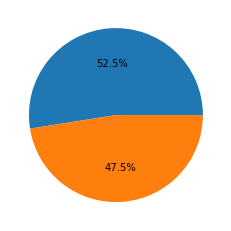

In [53]:
#number of sifferent class
sizes = y.value_counts(sort = 1)
# print(sizes/len(y))
plt.pie(sizes, autopct='%1.1f%%')

In [54]:
#data split
from sklearn.model_selection import train_test_split
#shuffle 
#crv = ShuffleSplit(n_splits = 5,test_size=0.2,random_state = 42)
#normal class validation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [55]:
# #define model
# from sklearn.ensemble import RandomForestClassifier
# #from sklearn.ensemble import RandomForestRegressor

# # Instantiate model with 10 decision trees
# model = RandomForestClassifier(n_estimators = 500, random_state = 30)
# # Train the model on training data
# model.fit(X_train, y_train)

In [56]:
# # model and result
# prediction_test = model.predict(X_test)
# #print(y_test, prediction_test)

# from sklearn import metrics
# #Print the prediction accuracy
# print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))
# #Test accuracy for various test sizes and see how it gets better with more training data

# #One amazing feature of Random forest is that it provides us info on feature importances
# # Get numerical feature importances
# #importances = list(model.feature_importances_)

# #Let us print them into a nice format.

# feature_list = list(X.columns)
# feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
# print(feature_imp)

In [9]:
#split data
n=X.shape[0]
#cross validation split(shuffle split)
crv = ShuffleSplit(n_splits = 10,test_size=0.1,random_state = 42)
#X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,train_size = 0.75,test_size=0.25, random_state=101)


# bootstrap =[True]
# max_depth=[10,20,30,40,50,60,70,80,90, 100, 120]
# max_features=['auto','sqrt']
# min_samples_leaf=[1,3, 4, 5]
# min_samples_split=[2, 5, 12]
# n_estimators=[100, 200, 500,700, 1000,1200,1500]

bootstrap =[True]
max_depth=[10,20]
max_features=['auto']
min_samples_leaf=[1,3]
min_samples_split=[2, 5, 12]
n_estimators=[100, 200]



# scoring = {'accuracy': 'precision','recall'}
score_list = ['accuracy','f1']

In [10]:
def para_tune(max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,cv):
    # score_list = ['accuracy','f1']
    scoring = ['balanced_accuracy', 'f1_weighted','precision_weighted','recall_weighted']
    result=[]
    for d in max_depth:
        for f in max_features:
            for m_l in min_samples_leaf:
                for m_s in min_samples_split:
                    for n_e in n_estimators:
                        clf = RandomForestClassifier(n_estimators=n_e,max_depth=d,min_samples_split=m_s,min_samples_leaf=m_l,max_features=f) 
                        start = time()
                        #--------------------------------------------------------------------------


                        #--------------------------------------------------------------------------
                        scores = cross_validate (clf, X, y, cv = cv, scoring = scoring,n_jobs = -1)
                        # f1 =   cross_val_score(clf, X, y, cv = cv, scoring='f1_weighted')
                        # a = sta.mean(accu)
                        # f = sta.mean(f1)
                        fit = np.mean(scores['fit_time'])
                        a = sta.mean(scores['test_balanced_accuracy'])
                        f = sta.mean(scores['test_f1_weighted'])
                        p = sta.mean(scores['test_precision_weighted'])
                        r = sta.mean(scores['test_recall_weighted'])
                        end = time()
                        time_cost = end-start
                        # result.append({'d':d,'c':c,'avg_accu':a})
                        result.append({'max_depth':d,'max_features':f,'min_samples_leaf':m_l,'min_samples_split':m_s,'fit':fit,'avg_accu':a,'f1':f,'precision':p,'recall':r,'time_cost':time_cost})
    
    r = pd.DataFrame(result)

    return r

In [57]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,20,30,40,50,60,70,80,90, 100, 120],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1,3, 4, 5],
    'min_samples_split': [2, 5, 12],
    'n_estimators': [100, 200, 500,700, 1000,1200,1500]
}
                     
scoring = ['balanced_accuracy', 'f1_weighted','precision_weighted','recall_weighted']
                     
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, random_state=42,
                          cv = 3, n_jobs = -1, verbose = 2,scoring = scoring,n_iter = 100,refit = 'balanced_accuracy')

In [20]:
# poly_res = para_tune(max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,2)
# poly_res.sort_values(by=['avg_accu'],ascending=False)

In [58]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train.values.ravel())
grid_search.best_params_
# grid_accuracy = evaluate(best_grid, X_test, y_test)


# print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': True}

In [59]:
best_grid = grid_search.best_estimator_
best_para = grid_search.best_params_
best_accu = best_grid.score(X_test,y_test)
print('best_para is ',best_para)
print('test accuracy is ', best_accu)

best_para is  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}
test accuracy is  0.5813953488372093


In [60]:
result = pd.DataFrame(grid_search.cv_results_)
result = result[['mean_fit_time','param_n_estimators', 'param_min_samples_split',
       'param_min_samples_leaf', 'param_max_features', 'param_max_depth',
       'param_bootstrap', 'params', 
       'mean_test_balanced_accuracy',
       'rank_test_balanced_accuracy', 
       'mean_test_f1_weighted', 
       'rank_test_f1_weighted', 
       'mean_test_precision_weighted', 
       'rank_test_precision_weighted', 
       'mean_test_recall_weighted', 
       'rank_test_recall_weighted']]
result.sort_values(by=['mean_test_balanced_accuracy'],ascending =False)

,mean_fit_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_f1_weighted,rank_test_f1_weighted,mean_test_precision_weighted,rank_test_precision_weighted,mean_test_recall_weighted,rank_test_recall_weighted
67,1.089411,200,5,1,sqrt,70,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.596485,1,0.596759,1,0.599474,1,0.599251,1
85,6.077460,1200,2,1,auto,20,True,"{'n_estimators': 1200, 'min_samples_split': 2,...",0.588875,2,0.588783,2,0.591949,2,0.590512,2
47,0.583624,100,12,1,sqrt,60,True,"{'n_estimators': 100, 'min_samples_split': 12,...",0.588154,3,0.588244,3,0.591342,3,0.590512,2
90,0.519622,100,5,4,auto,80,True,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.586080,4,0.586245,4,0.588873,6,0.588015,4
7,1.952447,500,2,4,sqrt,100,True,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.586064,5,0.585578,5,0.589844,4,0.588015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,7.167073,1500,5,5,auto,80,True,"{'n_estimators': 1500, 'min_samples_split': 5,...",0.570171,96,0.569651,95,0.573471,96,0.571785,95
57,8.450890,1500,5,5,auto,60,True,"{'n_estimators': 1500, 'min_samples_split': 5,...",0.568979,97,0.568054,97,0.572541,97,0.570537,97
18,4.744171,1200,2,3,sqrt,120,True,"{'n_estimators': 1200, 'min_samples_split': 2,...",0.567185,98,0.567132,98,0.570360,98,0.569288,98
93,2.445418,500,2,5,sqrt,90,True,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.565281,99,0.564430,100,0.568504,99,0.566792,99


In [28]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train.values.ravel())
grid_search.best_params_
# grid_accuracy = evaluate(best_grid, X_test, y_test)


# print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 1500,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [29]:
best_grid = grid_search.best_estimator_
best_para = grid_search.best_params_
best_accu = best_grid.score(X_test,y_test)
print('best_para is ',best_para)
print('test accuracy is ', best_accu)

best_para is  {'n_estimators': 1500, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True}
test accuracy is  0.5494186046511628


In [48]:
result = pd.DataFrame(grid_search.cv_results_)
result = result[['mean_fit_time','param_n_estimators', 'param_min_samples_split',
       'param_min_samples_leaf', 'param_max_features', 'param_max_depth',
       'param_bootstrap', 'params', 
       'mean_test_balanced_accuracy',
       'rank_test_balanced_accuracy', 
       'mean_test_f1_weighted', 
       'rank_test_f1_weighted', 
       'mean_test_precision_weighted', 
       'rank_test_precision_weighted', 
       'mean_test_recall_weighted', 
       'rank_test_recall_weighted']]
result.sort_values(by=['mean_test_balanced_accuracy'],ascending =False)

,mean_fit_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_f1_weighted,rank_test_f1_weighted,mean_test_precision_weighted,rank_test_precision_weighted,mean_test_recall_weighted,rank_test_recall_weighted
75,6.516664,1500,2,5,auto,80,True,"{'n_estimators': 1500, 'min_samples_split': 2,...",0.484240,1,0.511131,1,0.532292,1,0.520599,1
72,1.061932,200,2,5,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.483385,2,0.510309,2,0.529773,2,0.519351,2
48,7.090612,1500,12,4,sqrt,40,True,"{'n_estimators': 1500, 'min_samples_split': 12...",0.479596,3,0.506952,4,0.524849,3,0.516854,3
0,0.865439,200,12,1,auto,30,True,"{'n_estimators': 200, 'min_samples_split': 12,...",0.479028,4,0.507401,3,0.523893,4,0.516854,3
32,5.772872,1500,2,5,auto,20,True,"{'n_estimators': 1500, 'min_samples_split': 2,...",0.478529,5,0.504130,8,0.523383,5,0.513109,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0.398518,100,5,3,sqrt,80,True,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.456716,96,0.484475,93,0.493666,91,0.494382,86
78,3.196236,700,5,1,sqrt,40,True,"{'n_estimators': 700, 'min_samples_split': 5, ...",0.456497,97,0.481463,97,0.489983,95,0.490637,96
25,0.808050,200,5,1,auto,50,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.455701,98,0.482339,96,0.487878,97,0.490637,96
26,2.122469,500,2,1,sqrt,30,True,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.454224,99,0.479274,99,0.486248,99,0.486891,99


In [62]:
# #feature impotantce
# feature_list = list(X.columns)
# feature_imp = pd.Series(best_grid.feature_importances_,index=feature_list).sort_values(ascending=False)
# print(feature_imp)

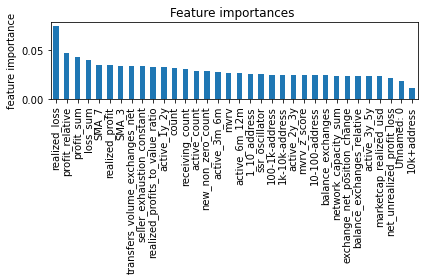

In [63]:
# Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean 
# and standard deviation of accumulation of the impurity decrease within each tree.
feature_imp = pd.Series(best_grid.feature_importances_,index=feature_list).sort_values(ascending=False)

fig, ax = plt.subplots()
feature_imp.plot.bar()
ax.set_title("Feature importances ")
ax.set_ylabel("feature importance")
fig.tight_layout()

In [27]:
pprint(grid_search.get_params())

Pretty printing has been turned ON
